In [2]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic
from gala.mpl_style import center_deemph, center_deemph_r

from totoro.potentials import get_equivalent_galpy
from totoro.actions_staeckel import get_staeckel_aaf
from tqdm.notebook import tqdm, trange

In [3]:
tbl = at.Table.read('/Users/apricewhelan/data/APOGEE_beta/occam_dr16_plus.dat', 
                    format='ascii.basic')
# tbl = at.Table.read('/Users/apricewhelan/data/APOGEE_DR16/occam_cluster-DR16.fits')

cg2018 = at.Table.read('/Users/apricewhelan/data/GaiaDR2/Cantat-Gaudin2018.fits')
cg2018.rename_column('Cluster', 'name')

tbl = at.join(tbl, cg2018, keys='name',  
              uniq_col_name='{col_name}{table_name}',
              table_names=['', '_cg'])
tbl = at.QTable(tbl)

In [4]:
# icrs = coord.SkyCoord(tbl['GLON']*u.deg, tbl['GLAT']*u.deg, 
#                       frame=coord.Galactic()).icrs

# R_GC = tbl['R_GC_CG']

# A = icrs.separation(coord.SkyCoord(0, 0, 
#                                    unit='deg', frame='galactic'))
# sinB = 8. * np.sin(A) / R_GC
# gamma = 180.*u.deg - (np.arcsin(sinB) + A)
# singamma = np.sin(gamma)
# d = R_GC / np.sin(A) * singamma

In [5]:
c = coord.SkyCoord(
    ra=tbl['RAJ2000'], 
    dec=tbl['DEJ2000'],
    distance=tbl['dmode'],
    pm_ra_cosdec=tbl['pmra']*u.mas/u.yr,
    pm_dec=tbl['pmdec']*u.mas/u.yr,
    radial_velocity=tbl['RV']*u.km/u.s)

In [6]:
galcen = c.transform_to(coord.Galactocentric())
galcen_mask = np.isfinite(galcen.x) & np.isfinite(galcen.v_x)

In [7]:
w0 = gd.PhaseSpacePosition(galcen.data[galcen_mask])
w0.shape

(120,)

In [8]:
mw = gp.MilkyWayPotential()
galpy_mw = get_equivalent_galpy(mw)

In [9]:
orbits = mw.integrate_orbit(w0, dt=-0.5, t1=0, t2=-6*u.Gyr)

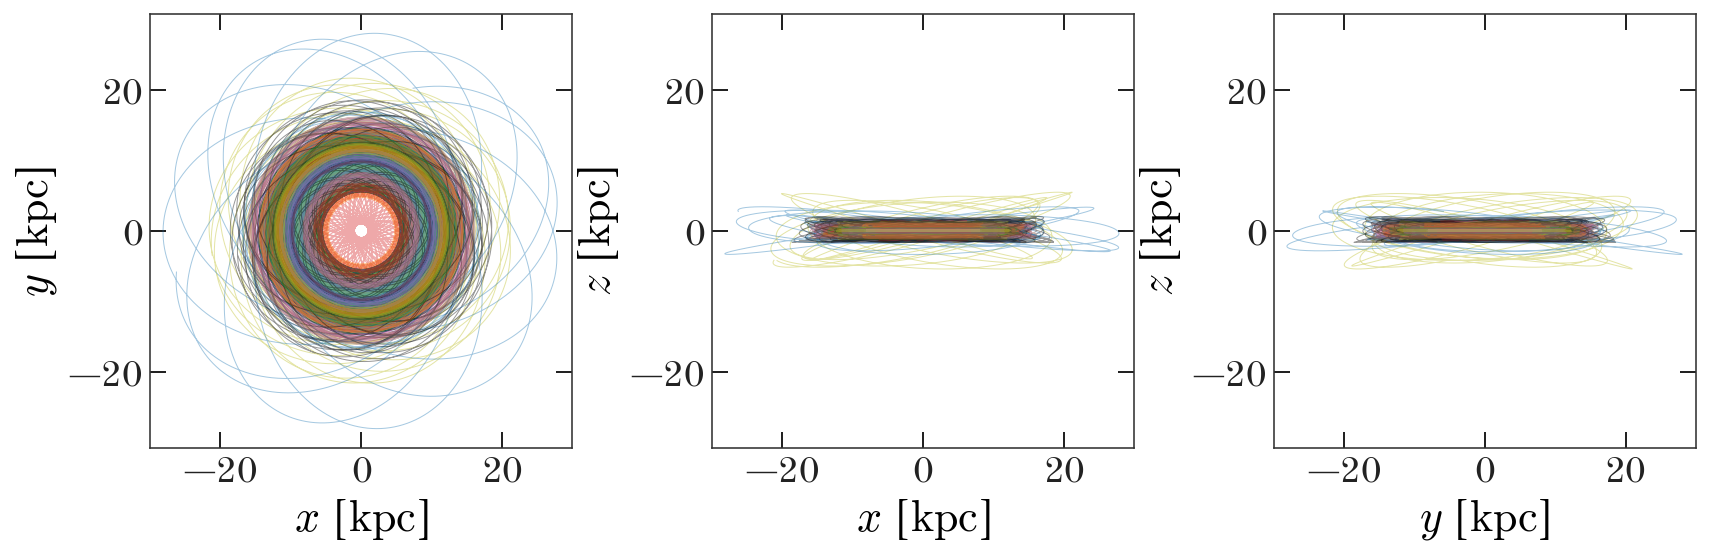

In [10]:
fig = orbits.plot(alpha=0.4, marker='', lw=0.5)
for ax in fig.axes:
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
fig.set_facecolor('w')

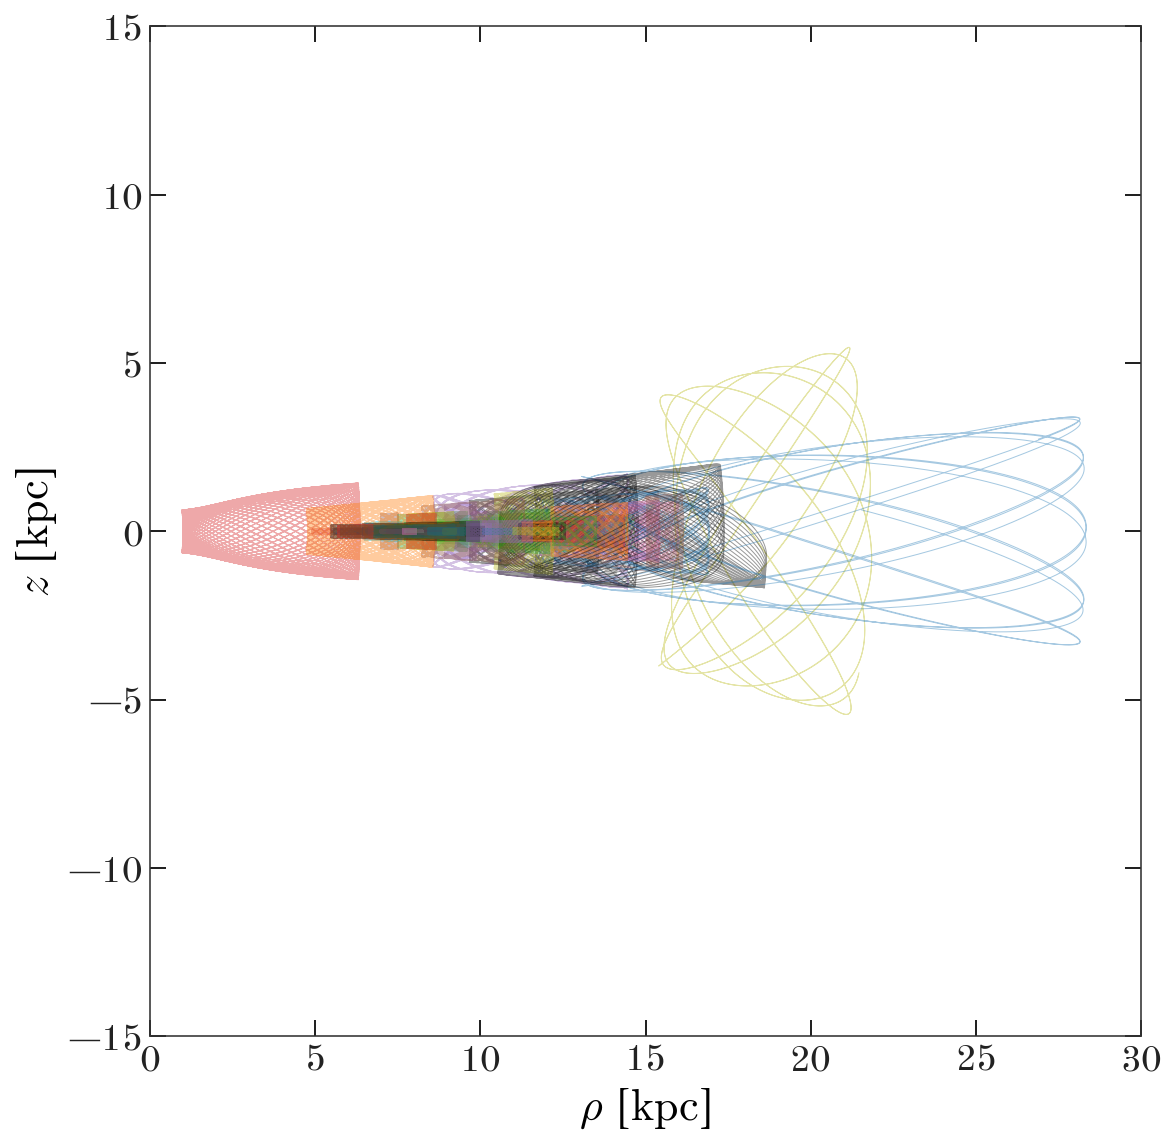

In [13]:
fig, axes = plt.subplots(figsize=(8, 8))
fig = orbits.cylindrical.plot(['rho', 'z'], alpha=0.4, marker='', lw=0.5,
                              axes=[axes])
for ax in fig.axes:
    ax.set_xlim(0, 30)
    ax.set_ylim(-15, 15)
fig.set_facecolor('w')

In [15]:
tbl[orbits.zmax().argmax()]

name,radius,age,l,b,num_stars,RV,RV_ERR,r_gc_cg,r_gc_dias,r_gc_mwsc,r_gc_parallax,r_gc_bj,r_gc,r_gc_err,r_guide,r_birth,X,Y,Z,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,CE_FE,ND_FE,YB_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,CE_FE_ERR,ND_FE_ERR,YB_FE_ERR,nC_FE,nCI_FE,nN_FE,nO_FE,nNA_FE,nMG_FE,nAL_FE,nSI_FE,nP_FE,nS_FE,nK_FE,nCA_FE,nTI_FE,nTIII_FE,nV_FE,nCR_FE,nMN_FE,nFE_H,nCO_FE,nNI_FE,nCU_FE,nGE_FE,nRB_FE,nCE_FE,nND_FE,nYB_FE,Z_max,pmra,pmdec,pmra_err,pmdec_err,RAJ2000,DEJ2000,GLON,GLAT,r50,Nstars,pmRA,pmDE,plx,dmode,dmode_01,dmode-01,X_cg,Y_cg,Z_cg,Rgc,SimbadName
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,deg,deg,deg,,mas / yr,mas / yr,mas,pc,pc,pc,pc,pc,pc,pc,
str17,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,bytes25
Berkeley_20,0.029999999329447746,9.680000305175781,203.4852818231794,-17.37631111241168,2,78.77584838867188,0.12604904174804688,15.988074869575394,15.68145432836171,15.680519897001966,14.47245772685305,13.866393007733999,15.988074869575394,0.41995000000000005,12.558847601840815,12.425500859932763,-7.639677252447279,-3.3194929544181027,-2.6065843558204977,-0.03909650444984436,-0.018486008048057556,0.26210999488830566,0.08125749230384827,-0.2070339322090149,0.06469069421291351,0.08732199668884277,0.06474198400974274,0.17494699358940125,0.21483898162841797,0.1568399965763092,0.04067528247833252,-0.0142764151096344,-0.022385001182556152,-0.03248198330402374,-0.0019269883632659912,-0.0382460355758667,-0.4048565626144409,0.06652200222015381,0.025202080607414246,0.19257749617099762,nan,nan,-0.021405398845672607,nan,nan,0.013649724121760945,0.02480182468360061,0.021295764704939442,0.015850164397472284,0.2436399757862091,0.02436099946498871,0.0946035087108612,0.01463158647272488,0.09294000267982483,0.05094791085044383,0.05292249935622271,0.020231042457053327,0.03139974921941757,0.10258027166128159,0.06565441329537003,0.0512878818340036,0.030684128403663635,0.02851499617099762,0.05184376894936916,0.02097606291868627,0.0635201707482338,nan,nan,0.08702597767114639,nan,nan,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,2,2,2,1,0,0,1,0,0,2.008872671085675,0.9337274760217932,-0.21016559243516064,0.07401766655998647,0.048744489082417214,83.152,0.185,203.485,-17.377,0.015,37,0.808,-0.244,0.040,14402.1,5899.2,nan,-12606.3,-5477.4,-4301.2,21650.6,Berkeley 20


In [17]:
tbl[np.max(orbits.cylindrical.rho, axis=0).argmax()]

name,radius,age,l,b,num_stars,RV,RV_ERR,r_gc_cg,r_gc_dias,r_gc_mwsc,r_gc_parallax,r_gc_bj,r_gc,r_gc_err,r_guide,r_birth,X,Y,Z,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,CE_FE,ND_FE,YB_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,CE_FE_ERR,ND_FE_ERR,YB_FE_ERR,nC_FE,nCI_FE,nN_FE,nO_FE,nNA_FE,nMG_FE,nAL_FE,nSI_FE,nP_FE,nS_FE,nK_FE,nCA_FE,nTI_FE,nTIII_FE,nV_FE,nCR_FE,nMN_FE,nFE_H,nCO_FE,nNI_FE,nCU_FE,nGE_FE,nRB_FE,nCE_FE,nND_FE,nYB_FE,Z_max,pmra,pmdec,pmra_err,pmdec_err,RAJ2000,DEJ2000,GLON,GLAT,r50,Nstars,pmRA,pmDE,plx,dmode,dmode_01,dmode-01,X_cg,Y_cg,Z_cg,Rgc,SimbadName
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,deg,deg,deg,,mas / yr,mas / yr,mas,pc,pc,pc,pc,pc,pc,pc,
str17,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,bytes25
Berkeley_29,0.02800000086426735,9.489999771118164,197.9471823903893,7.981565781721155,3,25.941566467285156,0.6803210377693176,20.24328564396305,22.4732795931585,18.468393950746137,18.15416315154793,17.135360329536134,20.24328564396305,0.53985,15.091574842472832,15.069977179259714,-11.874545282585947,-3.8461751745755217,1.7501219552633298,0.011463344097137451,-0.001167645095847547,0.1959073543548584,0.09956401586532593,-0.00027729073190130293,0.062388043850660324,0.06155216693878174,0.039191681891679764,0.1733403205871582,0.06961799412965775,-0.020795002579689026,0.029578080400824547,-0.13712942600250244,0.14467501640319824,-0.09765031933784485,-0.10868532210588455,-0.09827595949172974,-0.48580488562583923,0.16080200672149658,0.03280876204371452,0.06802749633789062,nan,nan,0.48337462544441223,nan,nan,0.03547511249780655,0.036381740123033524,0.06899195909500122,0.024870017543435097,0.06209742827386097,0.07155196368694305,0.1192108616232872,0.030841214582324028,0.08631250636460182,0.0931670218706131,0.06490263587726289,0.02292899628347202,0.039884522557258606,0.11920560896396637,0.11629880964756012,0.09970051050186157,0.03630516678094864,0.03213101625442505,0.10145082324743271,0.023324773484195985,0.0785568505525589,nan,nan,0.10677138715982437,nan,nan,3,3,3,3,3,3,3,3,3,3,2,3,1,1,3,3,1,3,3,3,1,0,0,1,0,0,1.418659677355492,0.15085131208319258,-1.0144764250499638,0.04018462785516904,0.03659823743022368,103.268,16.930,197.947,7.982,0.014,15,0.151,-1.010,0.023,19244.6,6582.0,nan,-18130.9,-5872.5,2672.3,27114.4,Berkeley 29


In [18]:
P = np.abs(orbits.estimate_period())
ecc = orbits.eccentricity(approximate=True)

In [19]:
aafs = {
    'actions': [],
    'angles': [],
    'freqs': []
}
for n in trange(w0.shape[0]):
    orbit_dop = mw.integrate_orbit(w0[n], dt=1., t1=0, t2=10 * P[n],
                                   Integrator=gi.DOPRI853Integrator)
    
    Delta = np.median(gd.get_staeckel_fudge_delta(mw, orbit_dop))
    aaf = at.QTable(get_staeckel_aaf(galpy_mw, orbit_dop, delta=Delta))
    
    for k in aaf.colnames:
        aafs[k].append(np.mean(aaf[k], axis=0))
        
for k in aafs:
    aafs[k] = u.Quantity(aafs[k])

In [20]:
Jphi_unit = -229*u.km/u.s * 8.1*u.kpc
JR_unit = 25 * u.km/u.s * 1*u.kpc
Jz_unit = 15 * u.km/u.s * 0.5*u.kpc
J_units = [JR_unit, Jphi_unit, Jz_unit]
J_names = [r'J_R', r'J_\phi', r'J_z']

<ipython-input-21-c5e3e3df6f7b>:4: RuntimeWarning: invalid value encountered in log10
  ax.plot(np.log10(aafs['actions'][:, i].to_value(J_unit)),



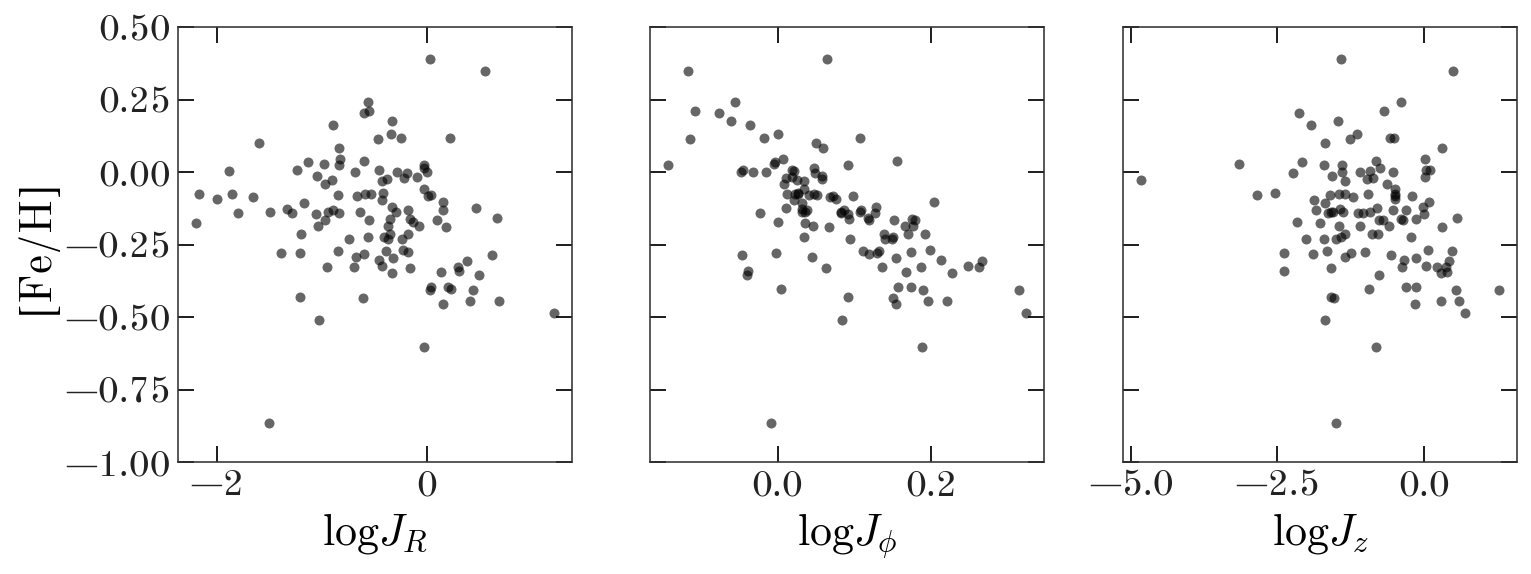

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, (ax, J_unit, name) in enumerate(zip(axes, J_units, J_names)):
    ax.plot(np.log10(aafs['actions'][:, i].to_value(J_unit)), 
            tbl['FE_H'],
            marker='o', mew=0, ls='none', alpha=0.6)
    ax.set_xlabel(rf'$\log{name}$')

axes[0].set_ylabel('[Fe/H]')
axes[0].set_ylim(-1, 0.5)

fig.set_facecolor('w')

<ipython-input-218-bdf5cb03489c>:4: RuntimeWarning: invalid value encountered in log10
  ax.plot(np.log10(aafs['actions'][:, i].to_value(J_unit)),


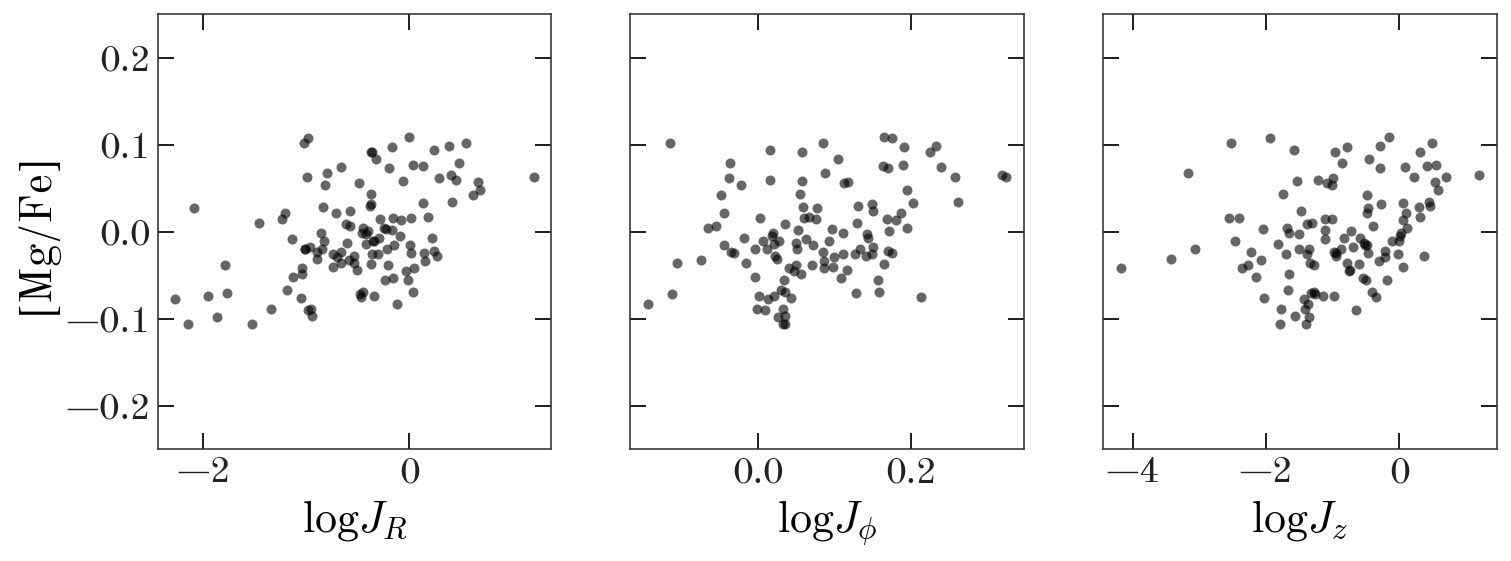

In [218]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, (ax, J_unit, name) in enumerate(zip(axes, J_units, J_names)):
    ax.plot(np.log10(aafs['actions'][:, i].to_value(J_unit)), 
            tbl['MG_FE'],
            marker='o', mew=0, ls='none', alpha=0.6)
    ax.set_xlabel(rf'$\log{name}$')

axes[0].set_ylabel('[Mg/Fe]')
axes[0].set_ylim(-0.25, 0.25)

fig.set_facecolor('w')

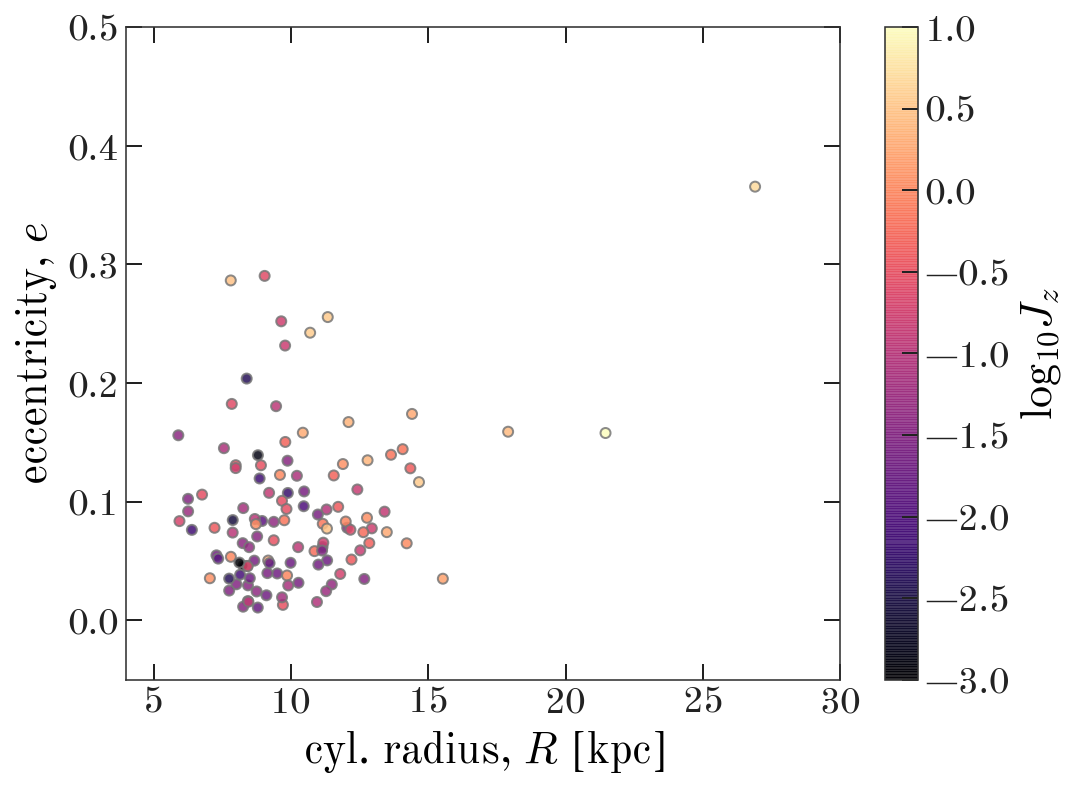

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.scatter(
    galcen.cylindrical.rho.to_value(u.kpc),
    ecc, 
    c=np.log10(aafs['actions'][:, 2].to_value(J_units[2])),
    alpha=0.85, vmin=-3, vmax=1, lw=1, edgecolor='#777777')

ax.set_xlabel('cyl. radius, $R$ [kpc]')
ax.set_ylabel('eccentricity, $e$')

ax.set_xlim(4, 30)
ax.set_ylim(-0.05, 0.5)

cb = fig.colorbar(cs)
cb.set_label(r'$\log_{\rm 10} J_z$')
fig.set_facecolor('w')

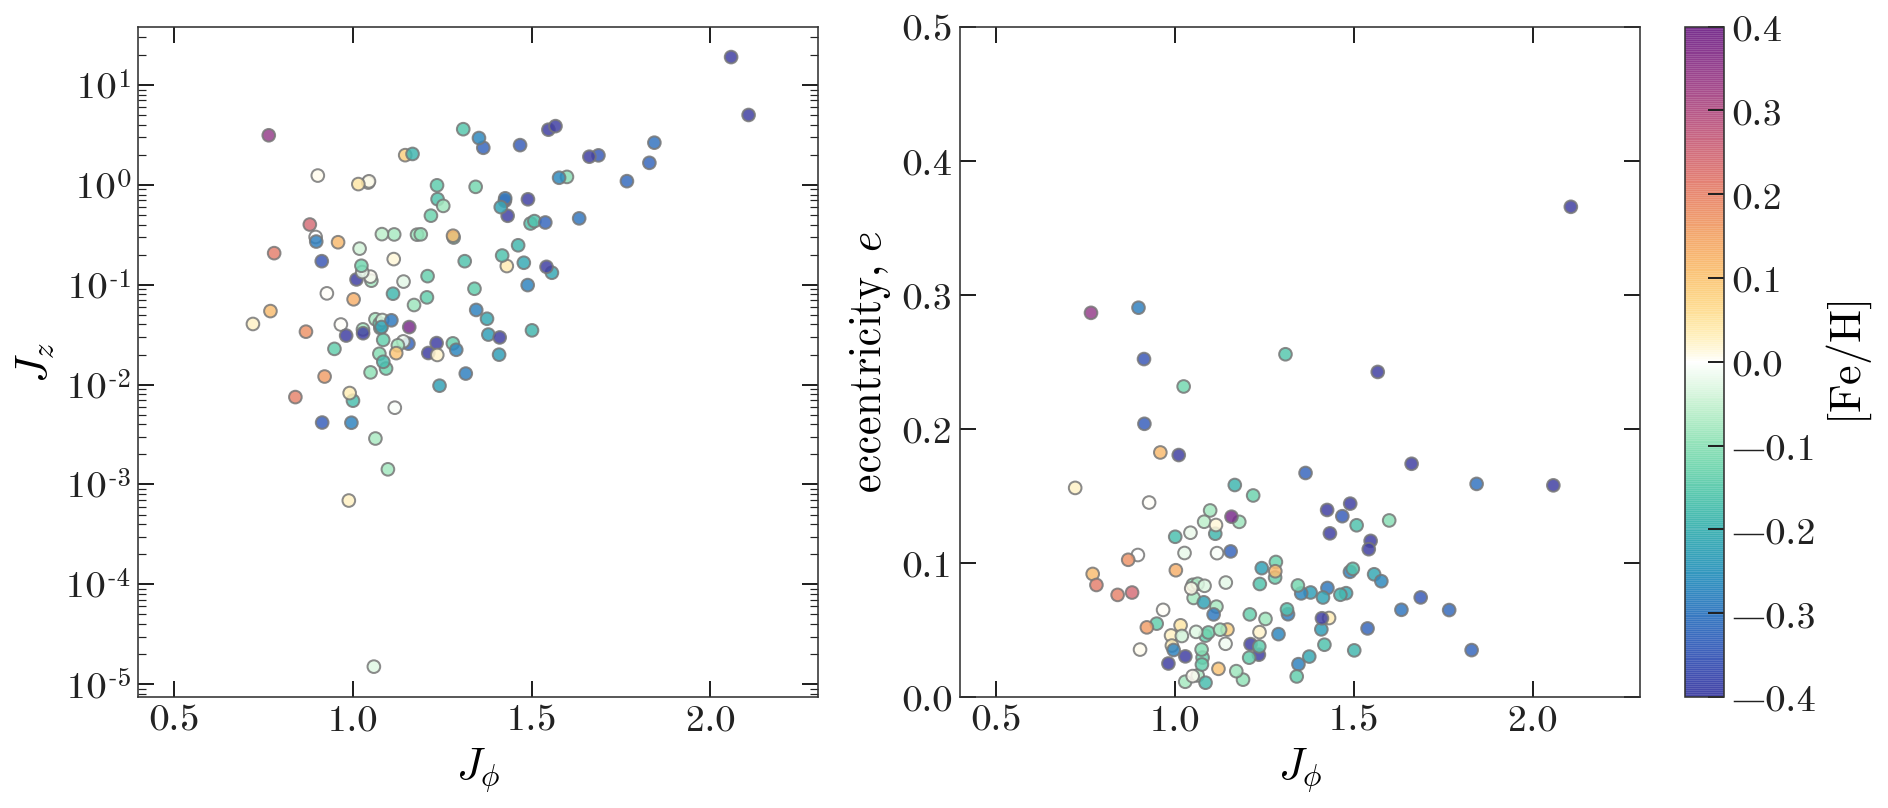

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5.5),
                         constrained_layout=True,
                         sharex=True)

ax = axes[0]
cs = ax.scatter(
    aafs['actions'][:, 1].to_value(J_units[1]),
    aafs['actions'][:, 2].to_value(J_units[2]),
    c=tbl['FE_H'],
    alpha=0.85, vmin=-0.4, vmax=0.4, 
    s=40, lw=1, edgecolor='#777777', cmap=center_deemph_r)

ax.set_xlabel(r'$J_\phi$')
ax.set_ylabel('$J_z$')

ax.set_xlim(0.4, 2.3)
ax.set_yscale('log')

ax = axes[1]
cs = ax.scatter(
    aafs['actions'][:, 1].to_value(J_units[1]),
    ecc,
    c=tbl['FE_H'],
    alpha=0.85, vmin=-0.4, vmax=0.4, 
    s=40, lw=1, edgecolor='#777777', cmap=center_deemph_r)

ax.set_xlabel(r'$J_\phi$')
ax.set_ylabel('eccentricity, $e$')

ax.set_xlim(0.4, 2.3)
ax.set_ylim(0, 0.5)

cb = fig.colorbar(cs, ax=axes, aspect=40)
cb.set_label(r'$[{\rm Fe} / {\rm H}]$')

fig.set_facecolor('w')

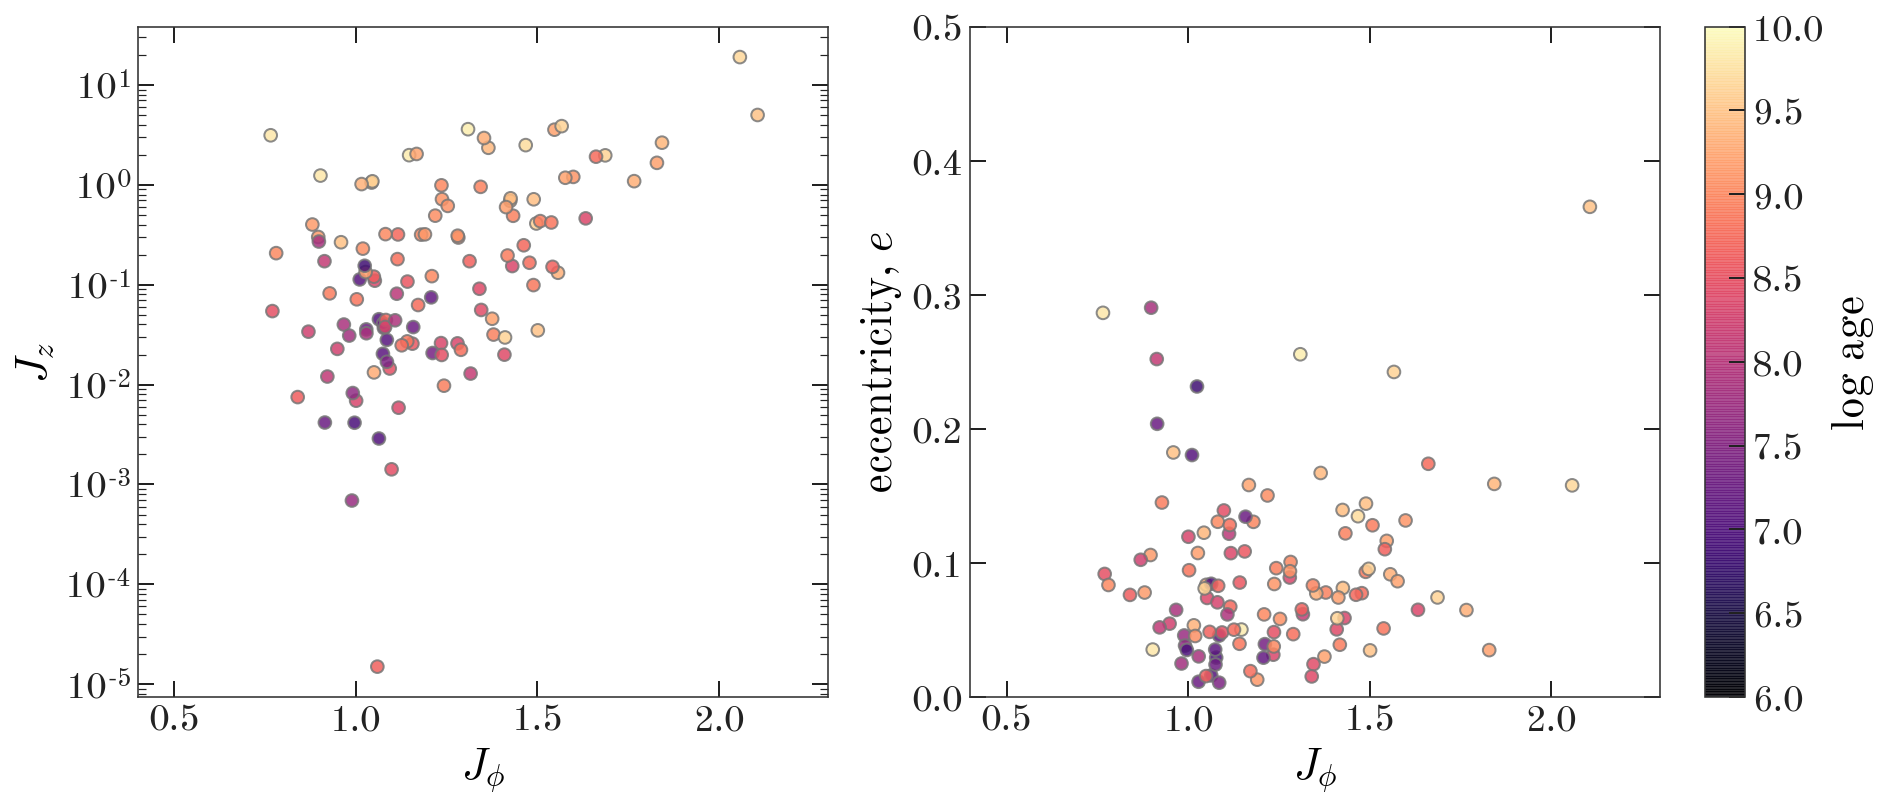

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5.5),
                         constrained_layout=True,
                         sharex=True)

ax = axes[0]
cs = ax.scatter(
    aafs['actions'][:, 1].to_value(J_units[1]),
    aafs['actions'][:, 2].to_value(J_units[2]),
    c=tbl['age'],
    alpha=0.85, vmin=6, vmax=10,
    s=40, lw=1, edgecolor='#777777', cmap='magma')

ax.set_xlabel(r'$J_\phi$')
ax.set_ylabel('$J_z$')

ax.set_xlim(0.4, 2.3)
ax.set_yscale('log')

ax = axes[1]
cs = ax.scatter(
    aafs['actions'][:, 1].to_value(J_units[1]),
    ecc,
    c=tbl['age'],
    alpha=0.85, vmin=6, vmax=10,
    s=40, lw=1, edgecolor='#777777', cmap='magma')

ax.set_xlabel(r'$J_\phi$')
ax.set_ylabel('eccentricity, $e$')

ax.set_xlim(0.4, 2.3)
ax.set_ylim(0, 0.5)

cb = fig.colorbar(cs, ax=axes, aspect=40)
cb.set_label(r'log age')

fig.set_facecolor('w')